## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
DF = pd.read_csv('ab_data.csv')
DF.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
DF.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
DF['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
(DF['converted'] == 1).mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
((DF['group'] == 'treatment') & (DF['landing_page'] == 'old_page')).sum() + ((DF['group'] == 'control') & (DF['landing_page'] == 'new_page')).sum()

3893

f. Do any of the rows have missing values?

In [7]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
DF['misaligned']=((DF['group']=='treatment') & (DF['landing_page']=='old_page')) | ((DF['group']=='control') & (DF['landing_page']=='new_page'))

In [9]:
# extract rows of misgligned that equal false
DF2 = DF.query('misaligned == False')

In [10]:
DF2.shape

(290585, 6)

In [11]:
# Double Check all of the correct rows were removed - this should be 0
DF2[((DF2['group'] == 'treatment') == (DF2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
DF2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
DF2.user_id.value_counts().sort_values(ascending = False).head()

773192    2
834487    1
936923    1
679687    1
719014    1
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [14]:
DF2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted,misaligned
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0,False
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0,False


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
DF2.drop(index=1899,inplace=True)

C:\Users\localadmin\Anaconda3\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
DF2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted,misaligned
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0,False


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
(DF2['converted']==1).mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
old_page = (DF2.query('group == "control"')['converted'] == 1).mean()
old_page

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
new_page = (DF2.query('group == "treatment"')['converted'] == 1).mean()
new_page

0.11880806551510564

d. What is the probability that an individual received the new page?

In [20]:
(DF2['landing_page'] == 'new_page').mean()

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**The difference between  control and treatment groups is very small. I am not convinced that one page leads to more conversions than other. More statistics needed.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

#### null: pold - pnew >= 0

#### alternative: pold - pnew < 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [21]:
p_new_null = (DF2['converted'] == 1).mean()
p_new_null

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [22]:
p_old_null = (DF2['converted'] == 1).mean()
p_old_null

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [23]:
n_new = (DF2['landing_page'] == 'new_page').sum()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [24]:
n_old = (DF2['landing_page'] == 'old_page').sum()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
new_page_converted = np.random.binomial(n_new, p_new_null)

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
old_page_converted = np.random.binomial(n_old, p_old_null)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
diffs = new_page_converted/n_new - old_page_converted/n_old
diffs

-0.0006492146188720183

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [28]:
p_diffs=[]
p_diffs = np.random.binomial(n_new, p_new_null, 10000)/n_new - np.random.binomial(n_old, p_old_null, 10000)/n_old

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

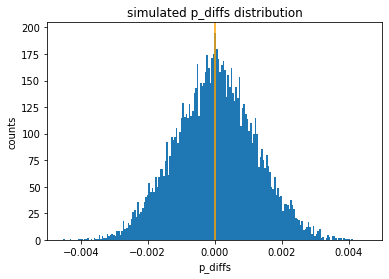

In [29]:
plt.hist(p_diffs, bins=200)
plt.xlim(-0.005, 0.005)
plt.xlabel('p_diffs')
plt.ylabel('counts')
plt.title('simulated p_diffs distribution')
plt.axvline(0.000, color='orange');

#### The center of p_diffs seem be at 0.000. In the simulation, p_new_null and p_old_null are equal .expect the center of p_diffs to be at 0.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [30]:
diffrence = new_page - old_page
diffrence, new_page, old_page 

(-0.0015782389853555567, 0.11880806551510564, 0.1203863045004612)

In [31]:
diffrence = new_page - old_page
(p_diffs > diffrence).mean()

0.9055

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

#### Based on  what  calculated in j is the pvalue and its equal to 0.90 which is larger than the alpha 0.05 so that the new page is not better 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [32]:
import statsmodels.api as sm

convert_old = (DF2.query('landing_page=="old_page"')['converted'] == 1).sum()
convert_new = (DF2.query('landing_page=="new_page"')['converted'] == 1).sum()
n_old = (DF2['landing_page'] == 'old_page').sum()
n_new = (DF2['landing_page'] == 'new_page').sum()
convert_old, convert_new, n_old, n_new

C:\Users\localadmin\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [33]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
z_score, p_value

(-1.3109241984234394, 0.9050583127590245)

In [34]:
from scipy.stats import norm
# Tells us how significant our z-score is
print(norm.cdf(z_score))

# for our single-sides test, assumed at 95% confidence level, we calculate: 
print(norm.ppf(1-(0.05)))

0.09494168724097551
1.6448536269514722


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

#### z-score is 1.31 which is less than the critical value 1.64. 
#### pvalue is 0.9 which is larger than alpha 0.05.
#### Based on z-score and pvalue I fail to reject null, which is pold − pnew >=0 , pnew is not statistically larger than pold

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [35]:
DF2['intercept'] = 1
DF2['ab_page'] = pd.get_dummies(DF2['group'])['treatment']
DF2.head()

C:\Users\localadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\localadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,user_id,timestamp,group,landing_page,converted,misaligned,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,False,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,False,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,False,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,False,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,False,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [36]:
model1 = sm.Logit(DF2['converted'], DF2[['intercept', 'ab_page']])
result1= model1.fit()
result1.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2022-02-03 13:06 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

#### The intercept = -1.9888. exp(-1.9888)=0.13686. which means the conversion rate of baseline case is 0.13686.
#### The coefficient for ab_page (treatment) is -0.015. exp(-0.015)=0.985. 1/0.985=1.015. This means that baseline (control that uses old_page) is 1.015 times likely to result in conversion relative to treatment.
#### Pvalue if 0.19. This is a large number compared to 0.05. Therefore I would not consider the results are statistically significant, and I fail to reject the null, which is that conversion rate does not depend on landing_page

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

#### Pvalue is 0.19, this is different from results in Part II because the null hypothesis is different. In Part II, null=new page is not better than old page, alternative=new page is better. 

#### So Part II is a one-sided test. Here, we hope to find out that conversion depends on which landing page users use. The alternative here is that conversion rates are different, and null is there is no difference. So this is a two-sided test

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

we will be better predicting response if other factors are considered.one disadvantage of including other factors is that explanatory variables might dependent on each other. Some predictors might lose significance, or result in even flipped coefficients

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

##### Read  country df

In [37]:
country = pd.read_csv('countries.csv')

##### Merging country and DF2 

In [38]:
DF2 = pd.merge(DF2,country, on=['user_id'])
DF2.head()

,user_id,timestamp,group,landing_page,converted,misaligned,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,False,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,False,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,False,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,False,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,False,1,0,US


##### Create dummy columns for country

In [39]:
DF2[['CA', 'UK','US']] = pd.get_dummies(DF2['country'])
DF2.head(1)

,user_id,timestamp,group,landing_page,converted,misaligned,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,False,1,0,US,0,0,1


##### Logistic regression on counties

In [40]:
model2 = sm.Logit(DF2['converted'], DF2[['intercept', 'CA', 'UK']])
result2 = model2.fit()
result2.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.8333
Date:               2022-02-03 13:07 BIC:              212812.5723
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           2                LL-Null:          -1.0639e+05
Df Residuals:       290581           LLR p-value:      0.19835    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9967    0.0068  -292.3145  0.0000  -2.0101  -1.9833
CA           -0.0408    0.0269    -1.5178  0.1291  -0.0935   0.0119
UK            0.0099    0.0133     0.7458  0.4558  -0.0161   0.0360
==================================================================

"""

#### Here the baseline is US.
#### The coef for CA is -0.0408. exp(-0.048)=0.953. 1/0.953=1.049.
#### This means users in US is 1.049 times likely to convert relative to users in CA.
#### The coef for UK is 0.0099. exp(0.0099)=1.01.
#### This means users in UK is 1.01 times likely to convert, relative to users in US.
#### The Pvalues for CA and UK are large, so I won't consider the results are statistically significant

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [41]:
DF2['UK_ab_page'] = DF2['UK'] * DF2['ab_page']
DF2['CA_ab_page'] = DF2['CA'] * DF2['ab_page']

In [42]:
model3 = sm.Logit(DF2['converted'], DF2[['intercept','UK','CA', 'UK_ab_page','CA_ab_page']])
result3 = model3.fit()
result3.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.9259
Date:               2022-02-03 13:07 BIC:              212835.8241
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           4                LL-Null:          -1.0639e+05
Df Residuals:       290579           LLR p-value:      0.27295    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9967    0.0068  -292.3145  0.0000  -2.0101  -1.9833
UK            0.0045    0.0175     0.2572  0.7970  -0.0298   0.0389
CA           -0.0073    0.0371    -0.1963  0.8444  -0.0799   0.0654
UK_ab_page    0.0108    0.0228     0.4749  0.6349  -0.0339   0.0555
CA_ab_page   -0.0674    0.0520    -1.2967  0.1947  -0.1694   0.0345
==================================================================

"""

In [43]:
model3 = sm.Logit(DF2['converted'], DF2[['intercept', 'UK_ab_page','CA_ab_page']])
result3 = model3.fit()
result3.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212779.0384
Date:               2022-02-03 13:09 BIC:              212810.7773
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           2                LL-Null:          -1.0639e+05
Df Residuals:       290581           LLR p-value:      0.080850   
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9963    0.0062  -322.0487  0.0000  -2.0084  -1.9841
UK_ab_page    0.0149    0.0173     0.8617  0.3888  -0.0190   0.0488
CA_ab_page   -0.0752    0.0376    -1.9974  0.0458  -0.1489  -0.0014
==================================================================

"""

#### Coef for UK_ab_page = 0.0149. exp(-0.0149)=0.985. 1/0.985=1.015
#### Which means users in control group is 1.015 time like to be converted relative to treatment group, holding everything else constant.
#### Coef for CA_ab_page = -0.0752. exp(-0.0752)=0.953, 1/0.953=1.049
#### That means users in US are 1.049 times likely to be converted relative to users in CA, holding everything else constant.
#### Coefficients obtained here are not different from those obtained in previous sections. Therefore I conclude that there is no effects whether to include single or multiple variables. The variables ab_page and country seem to be independent on each other.
#### Pvalues for CA and UK are large, so I won't consider the results are statistically significant


- For the logistic regression , I intend to prove that conversion rate depends on landing page, therefore it is a two-sided hypothesis test. The null is there is no difference between the conversion rate of old and new page. The alternative is there is a difference. The resulted p value from my test is close to 0.2, therefore I failed to reject null, and conclude that  there is no statistically significant difference in conversion rate between old and new landing_page.


<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [50]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0